Title: Document Normalization
Author: Thomas M. Breuel
Institution: UniKL

In [73]:

from pylab import *
from scipy.ndimage import filters
gray()

# Example: Grayscale Image Normalization

(document normalization)

A common problem in document analysis is to turn a stained, poor quality grayscale image back into a binary image.



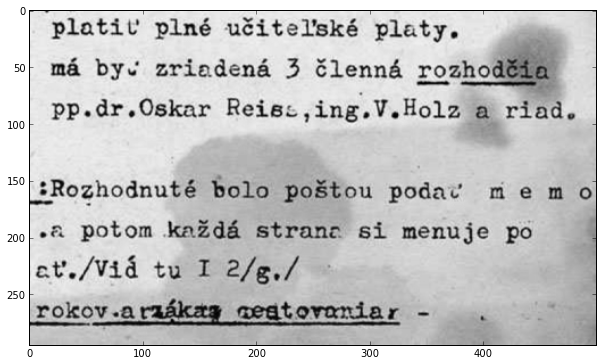

In [74]:
doc = mean(imread("Figures/historical.jpg"),axis=2); doc /= amax(doc)
imshow(doc)

(ink = high value convention)

We generally work on the negative image (ink=high values); this simplifies some of the formulas and boundary conditions.



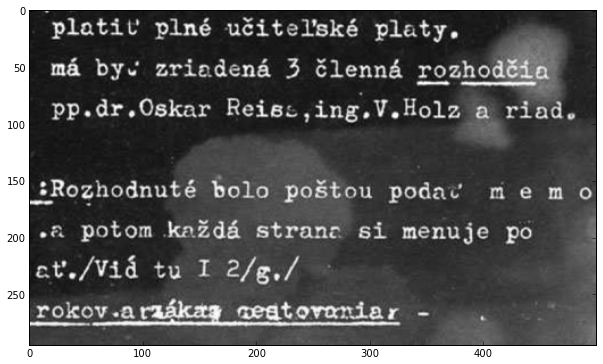

In [75]:
doc = 1-doc
imshow(doc)

In [76]:


from scipy.ndimage.filters import minimum_filter,maximum_filter

(background estimate)

A good estimate of the paper background is given by the local minimum of the image value.


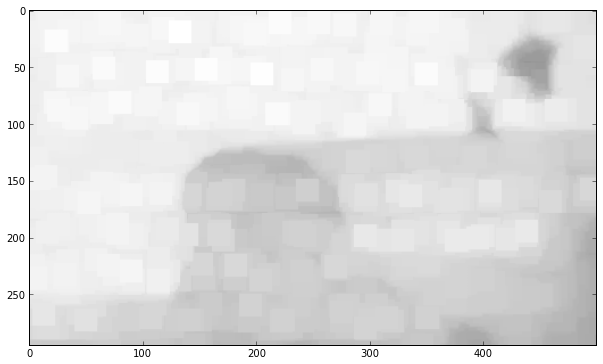

In [77]:
# paper estimate
paper = minimum_filter(doc,20)
imshow(1-paper,vmin=0,vmax=1)

(shrinkage)

Note, however, that the minimum operation tends to shrink the region, giving fringes. You can see that in this color image where you have green rings invading the background stains.



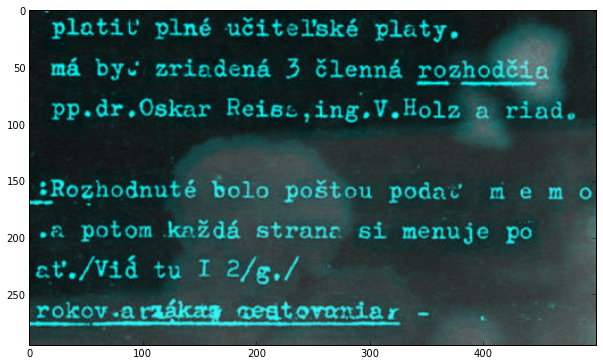

In [78]:
imshow(transpose(array([paper,doc,doc]),[1,2,0]))

(opening)

A solution is to compute a maximum after the minimum. This is a special case of _morphological opening_.

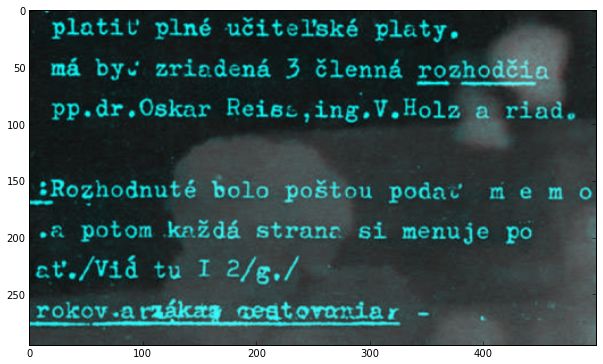

In [79]:
paper = maximum_filter(minimum_filter(doc,20),20)
imshow(transpose(array([paper,doc,doc]),[1,2,0]))

(background subtraction)

We can subtract this to normalize the image partially by paper background value. 



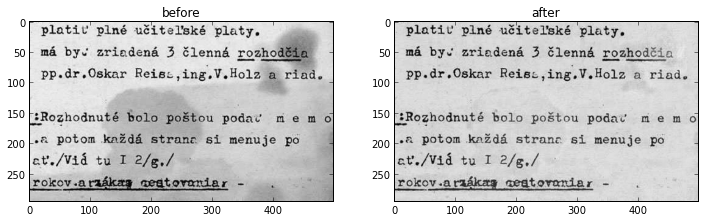

In [80]:
deltas = doc - paper
figsize(12,6)
subplot(121); imshow(1-doc); title("before")
subplot(122); imshow(1-deltas); title("after")


(foreground normalization)

Note how the ink is fading in some places; can we normalize that as well? We can perform a local ink-level estimate as well.



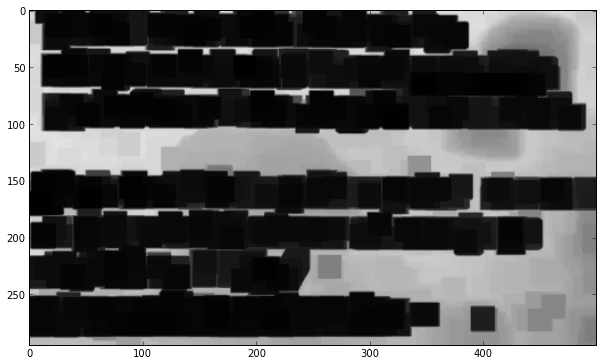

In [81]:
ink = maximum_filter(doc,20)
imshow(1-ink,vmin=0,vmax=1)

(local intensity range scale)

Given the ink and paper values, we can rescale the gray values.



0.030585106383 0.981382978723


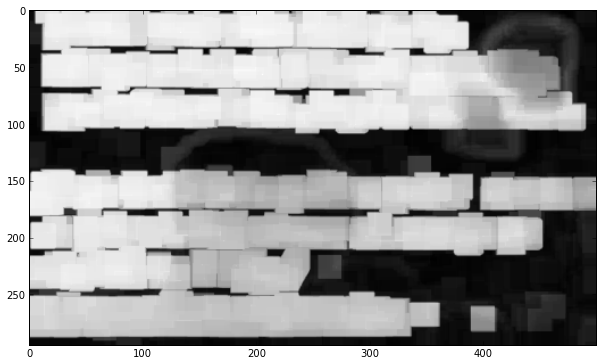

In [82]:
ranges = ink-paper
imshow(ranges); print amin(ranges),amax(ranges)

(result of normalization)

We can now normalize this range so that ink = 1 and background = 0 locally across the whole image.



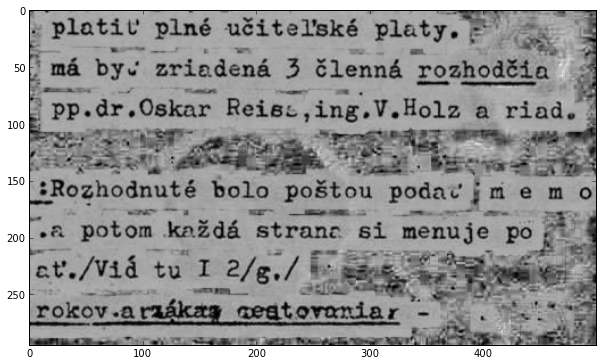

In [83]:
imshow(1-deltas/ranges)

(thresholding)

We can now _threshold_ the image to get back the printed ink.



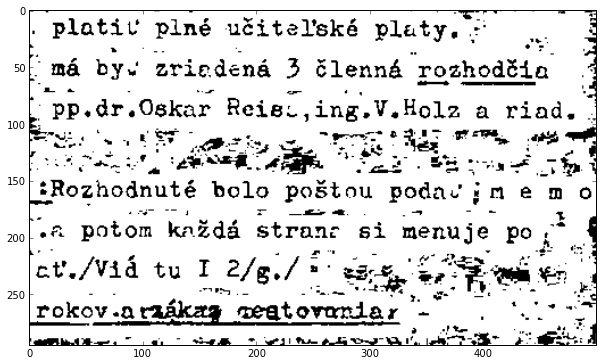

In [84]:
imshow(deltas/ranges<0.5)

(detecting background-only regions)

This obviously doesn't work well in areas where there is no ink at all. We can fix this by requiring a minimum range difference; if that isn't met, we assume that the local region contains just background (paper) pixels.



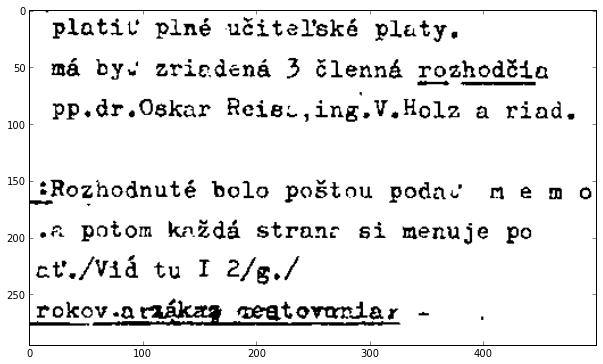

In [85]:
imshow(where(ranges<0.3,1.0,deltas/ranges<0.5))

(normalized gray level image)

We can also derive a reasonable normalized gray level image with a little bit of arithmetic.



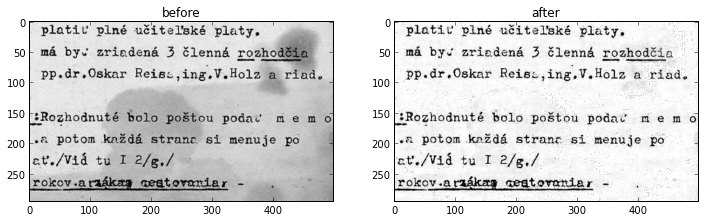

In [86]:
normalized = deltas/(maximum(0.7,ranges))
subplot(121); imshow(1-doc); title("before")
subplot(122); imshow(1-normalized**1.1); title("after")